# Analyzing the downloaded data

## Assumptions

You have used the `download_stenos.py` and `generate_pandas.py` to download the steno protocols and save them into a compressed pickle.

I have them under ./data/ folder, you will have to adjust the paths accordingly to your storage location.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df2017 = pd.read_csv('./data/psp2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2013 = pd.read_csv('./data/psp2013_2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')

print("Pandas version: {}".format(pd.__version__))

df2017.columns

Pandas version: 0.24.1


Index(['session', 'date', 'topic_idx', 'topic_str', 'order', 'name',
       'steno_name', 'file_name', 'tokens', 'birthyear', 'age', 'sex',
       'titles', 'party', 'text'],
      dtype='object')

The data frame contains interventions in each two and the following columns:
   
   - 'session', 'date', 'topic_idx', 'topic_str', 'order', 
     The session, the date of the session, the topic being discussed, and the order of intervention for the session
   
   - 'name','steno_name', 
     The name of the speacker and the string that appears in the steno protocol
   
       - 'age', 'sex', 'titles','party', 'birthday'
       Information about the speaker; `age is the age at the time of the last steno of the dataset`
   
   - 'file_name', 'text', 
     The file name that contains the information, and the text in the filed
   
   - 'tokens', 
     The number of tokens on the unfiltered file


We have loaded all the stenos and metadata from the sessions between 2013-2017 in the df2013 data frame and the protocols from 2017 into df2017, the data frames have the following columns.

For 2013-2017 we have 29067 files 

In [2]:
print("2013-2017")
print("\tTotal files:  {}".format(df2013["tokens"].count()))
print("\tTotal tokens: {}".format(df2013["tokens"].sum()))


print("2017-")
print("\tTotal files:  {}".format(df2017["tokens"].count()))
print("\tTotal tokens: {}".format(df2017["tokens"].sum()))

2013-2017
	Total files:  28947
	Total tokens: 5621523
2017-
	Total files:  12597
	Total tokens: 2540961


We can see who are the people that have more tokens, for that we will group the data frame by `name` and sum the tokens. Finally we can take the 20 largest.

In [3]:
top_n = 20
g_name_2013 = df2013.groupby(["name","party"])
print("Total number of different speakers: {}\n".format(len(g_name_2013)))
print("Top {} speakers by number of tokens for 2013-2017".format(top_n))
g_name_2013[["party","tokens"]].sum(level=0).nlargest(top_n, "tokens")

Total number of different speakers: 260

Top 20 speakers by number of tokens for 2013-2017


,,tokens
name,party,
Zbyněk Stanjura,ODS,387564
Bohuslav Sobotka,ČSSD,267594
Miroslav Kalousek,TOP09,187703
Petr Bendl,ODS,134829
František Laudát,TOP09,112293
Andrej Babiš,ANO2011,111385
Martin Kolovratník,ANO2011,106727
Vojtěch Filip,KSČM,103694
Ludvík Hovorka,KDU-ČSL,97121


In [4]:
top_n = 20
g_name_2017 = df2017.groupby(["name","party"])
print("Total number of different speakers: {}\n".format(len(g_name_2017)))

print("Top {} speakers by number of tokens for 2017".format(top_n))
g_name_2017[["party","tokens"]].sum(level=0).nlargest(top_n, "tokens")


Total number of different speakers: 248

Top 20 speakers by number of tokens for 2017


,,tokens
name,party,
Zbyněk Stanjura,ODS,130492
Andrej Babiš,ANO2011,82982
Alena Schillerová,ANO2011,70063
Martin Kolovratník,ANO2011,69119
Jakub Michálek,Piráti,66930
Miroslav Kalousek,TOP09,54501
Tomio Okamura,SPD,50087
Adam Vojtěch,ANO2011,49693
Mikuláš Ferjenčík,Piráti,49195


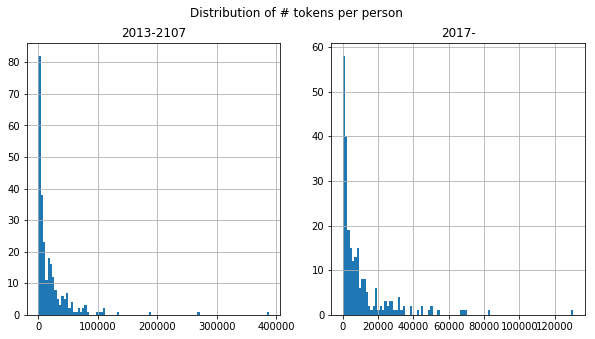

In [6]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

plt.suptitle("Distribution of # tokens per person")
ax1=plt.subplot(121)
df2013.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
plt.title("2013-2107")
ax1=plt.subplot(122)
df2017.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
_ = plt.title("2017-")


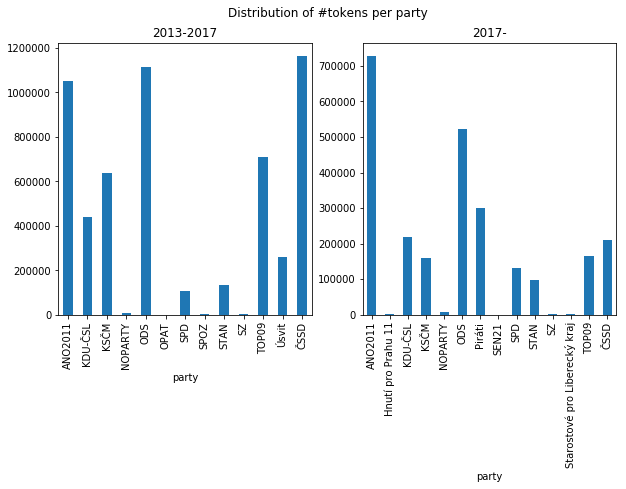

In [7]:
plt.suptitle('Distribution of #tokens per party')
ax1 = plt.subplot(121)
kk=df2013.groupby(["party"])["tokens"].sum().plot.bar(ax=ax1)
_ = plt.title("2013-2017")

ax1 = plt.subplot(122)
kk=df2017.groupby(["party"])["tokens"].sum().plot.bar(ax=ax1)
_ = plt.title("2017-")



Now let's count how many interventions have more than 1000 tokens

In [29]:
limit = 1000
long2013 = df2013[df2013["tokens"] > limit]["text"].count()
long2013_tokens = df2013[df2013["tokens"] > limit]["tokens"].sum()
long2017 = df2017[df2017["tokens"] > limit]["text"].count()
long2017_tokens = df2017[df2017["tokens"] > limit]["tokens"].sum()
print(f"Long interventions (more than {limit} tokens) in 2013-2017: {long2013} - total tokens {long2013_tokens} ")
print(f"Long interventions (more than {limit} tokens) in 2017: {long2017} - total tokens {long2017_tokens}")


Long interventions (more than 1000 tokens) in 2013-2017: 171 - total tokens 192204 
Long interventions (more than 1000 tokens) in 2017: 87 - total tokens 98206


Finally we can aggregate the tokens per speaker per session and check the number of tokens we obtain considering only those speakers that have an aggregated number of tokens per session over 1000

In [58]:
limit = 1000
grp2013 = df2013.groupby(by=["name", "session", "text"])
grp2017 = df2017.groupby(by=["name", "session"])
long2013 = grp2013["tokens"].sum()[ grp2013["tokens"].sum() > limit ].count()
long2013_tokens = grp2013["tokens"].sum()[ grp2013["tokens"].sum() > limit].sum()
long2017 = grp2017["tokens"].sum()[ grp2017["tokens"].sum() > limit].count()
long2017_tokens = grp2017["tokens"].sum()[ grp2017["tokens"].sum() > limit].sum()
print(f"Long aggregated interventions (more than {limit} tokens) in 2013-2017: {long2013} - total tokens {long2013_tokens}")
print(f"Long aggregated interventions (more than {limit} tokens) in 2017: {long2017} - total tokens {long2017_tokens}")


Long aggregated interventions (more than 1000 tokens) in 2013-2017: 189 - total tokens 225930
Long aggregated interventions (more than 1000 tokens) in 2017: 776 - total tokens 2035439
